# Search Tutorial

## 1. Data Structure
### 1.1 Stack

In [1]:
class Stack:
    def __init__(self):
        self._elements = []
        self._size = 0
        
    def is_empty(self):
        if self._size == 0:
            return True
        else:
            return False
        
    def push(self, e):
        self._elements = self._elements + [e]
        self._size += 1
        
    def pop(self):
        if self.is_empty():
            raise Exception("Stack underflow!")  # report error and end the program
        e = self._elements[-1]                   # delete the last element
        self._size -= 1
        self._elements = self._elements[:self._size]
        return e
    
    def get_size(self):
        return self._size
    
s = Stack()
s.push(1)
s.push(2)
s.push(3)
print(s.get_size())

out1 = s.pop()
out2 = s.pop()
out3 = s.pop()
print(s.get_size())
print("out order:", out1, out2, out3)

3
0
out order: 3 2 1


### 1.2 Queue

In [2]:
class Queue:
    def __init__(self):
        self._elements = []
        self._size = 0
        
    def is_empty(self):
        if self._size == 0:
            return True
        else:
            return False
        
    def enqueue(self, e):
        self._elements = self._elements + [e]
        self._size += 1
        
    def dequeue(self):
        if self.is_empty():
            raise Exception("Queue underflow!")  # report error and end the program
        e = self._elements[0]                    # delete the first element
        self._size -= 1
        self._elements = self._elements[1:]
        return e
    
    def get_size(self):
        return self._size
    
q = Queue()
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)
print(q.get_size())

out1 = q.dequeue()
out2 = q.dequeue()
out3 = q.dequeue()
print(q.get_size())
print("out order:", out1, out2, out3)  

3
0
out order: 1 2 3


### 1.3 Priority Queue

In [3]:
# demonstration with numerical sequence

class PriorityQueue:
    def __init__(self):
        self._elements = []
        self._size = 0
        
    def is_empty(self):
        if self._size == 0:
            return True
        else:
            return False
        
    def enqueue(self, e):
        self._elements = self._elements + [e]
        self._size += 1
        
    def dequeue(self):
        if self.is_empty():
            raise Exception("PriorityQueue underflow!")  # report error and end the program
        prior_index = 0
        for i in range(self._size):
            if self._elements[i]<self._elements[prior_index]:
                prior_index = i
        e = self._elements[prior_index]                    # delete the element with max priority
        self._size -= 1
        self._elements = self._elements[:prior_index]+self._elements[prior_index+1:]
        return e
    
    def get_size(self):
        return self._size
    
pq = PriorityQueue()
pq.enqueue(3)
pq.enqueue(2)
pq.enqueue(1)
print(pq.get_size())

out1 = pq.dequeue()
out2 = pq.dequeue()
out3 = pq.dequeue()
print(pq.get_size())
print("out order:", out1, out2, out3)

3
0
out order: 1 2 3


In [5]:
# utilize heapq
# record nodes and priority

import heapq

class PriorityQueue:

    def __init__(self):
        self.heap = []
        self.count = 0

    def push(self, item, priority):
        entry = (priority, self.count, item)
        heapq.heappush(self.heap, entry)
        self.count += 1

    def pop(self):
        (_, _, item) = heapq.heappop(self.heap)
        return item

    def isEmpty(self):
        return len(self.heap) == 0

    def update(self, item, priority):
        # If item already in priority queue with higher priority, update its priority and rebuild the heap.
        # If item already in priority queue with equal or lower priority, do nothing.
        # If item not in priority queue, do the same thing as self.push.
        # return True if this item is updated (priority changed or newly inserted), False if unchanged
        for index, (p, c, i) in enumerate(self.heap):
            if i == item:
                if p <= priority:
                    return False
                del self.heap[index]
                self.heap.append((priority, c, item))
                heapq.heapify(self.heap)
                return True
            else:
                self.push(item, priority)
                return True
        
pq = PriorityQueue()
pq.push("S", 0)
pq.push("A", 1)
pq.push("B", 2)
print(pq.heap)

[(0, 0, 'S'), (1, 1, 'A'), (2, 2, 'B')]


## 2. I/O

In [8]:
filename = "./testcases/input4.txt"

with open(filename, "r") as f:
    s = f.read().strip().split("\n")
    
Actions = [item.split() for item in s]
print(Actions[:-1])

[['Start', 'B', '5'], ['B', 'Start', '5'], ['Start', 'C', '3'], ['C', 'Start', '3'], ['B', 'D', '2'], ['D', 'B', '2'], ['B', 'E', '3'], ['E', 'B', '3'], ['B', 'F', '6'], ['F', 'B', '6'], ['C', 'E', '8'], ['E', 'C', '8'], ['C', 'F', '7'], ['F', 'C', '7'], ['D', 'G', '3'], ['G', 'D', '3'], ['E', 'G', '5'], ['G', 'E', '5'], ['E', 'H', '2'], ['H', 'E', '2'], ['F', 'G', '6'], ['G', 'F', '6'], ['F', 'H', '6'], ['H', 'F', '6'], ['G', 'Goal', '4'], ['Goal', 'G', '4'], ['H', 'Goal', '3'], ['Goal', 'H', '3']]


In [9]:
# visulize

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set()

<IPython.core.display.Javascript object>


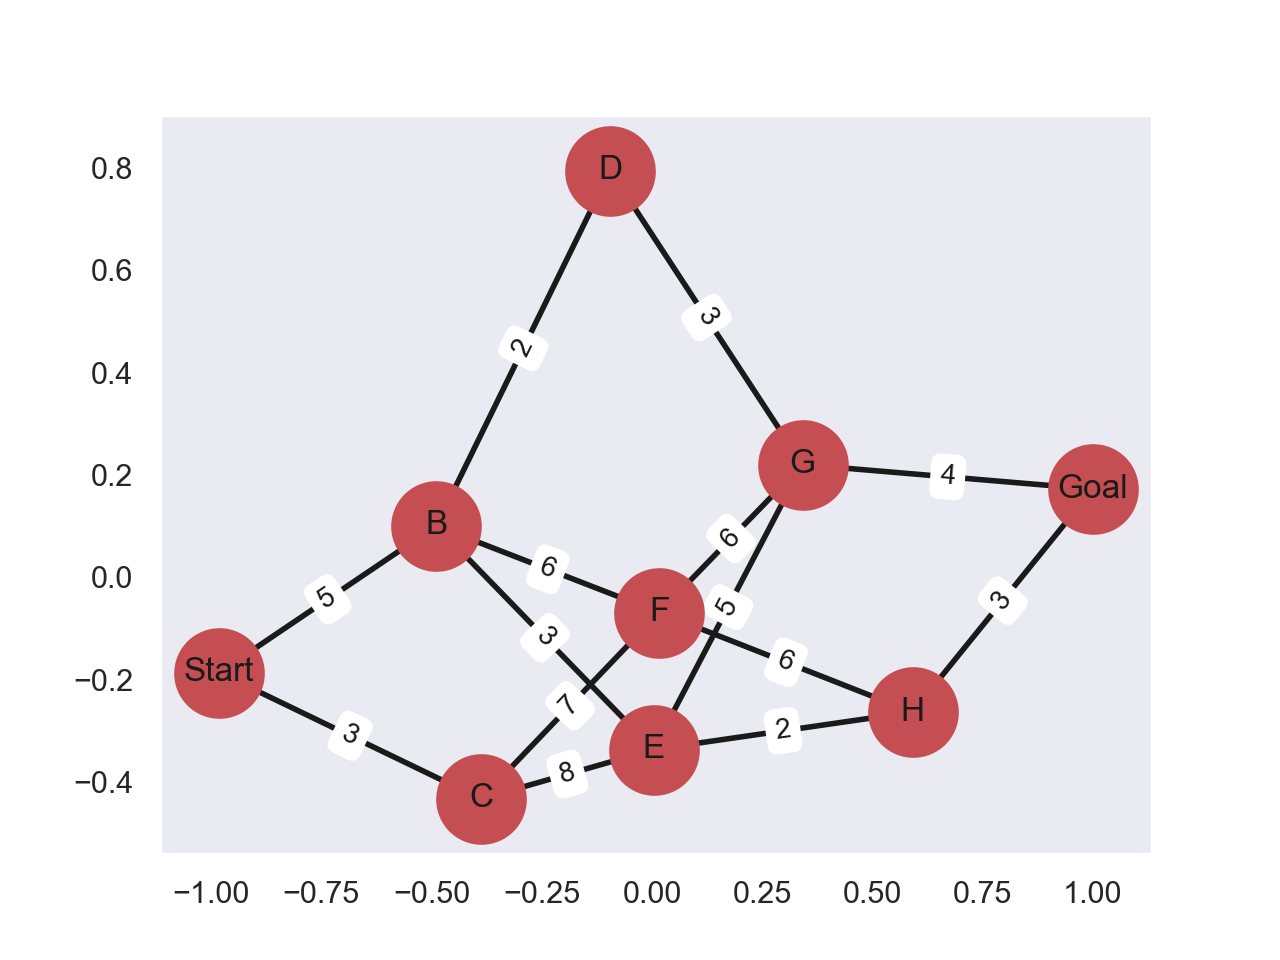

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [12]:
nodes = set([item[0] for item in Actions[:-1]] + [item[1] for item in Actions[:-1]])
edges = [(item[0], item[1], int(item[2])) for item in Actions[:-1]]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
G = nx.Graph()
for node in nodes:
    G.add_node(node)
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])
    
pos = nx.spring_layout(G)  # positions for all nodes
weight = nx.get_edge_attributes(G, "weight")

nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, weight)
ax.grid(False)
plt.show()